<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 5.1.1
# *Evaluating Classification Models*

In this lab you will be practicing evaluating classification models (Logistic Regression in particular) on a "Breast Cancer" data.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
plt.style.use('ggplot')
%matplotlib inline

### 1. Load Data

Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image. n the 3-dimensional space is that described in: [K. P. Bennett and O. L. Mangasarian: "Robust Linear Programming Discrimination of Two Linearly Inseparable Sets", Optimization Methods and Software 1, 1992, 23-34].

This database is also available through the UW CS ftp server: ftp ftp.cs.wisc.edu cd math-prog/cpo-dataset/machine-learn/WDBC/

Also can be found on UCI Machine Learning Repository: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29

Attribute Information:

1) ID number 2) Diagnosis (M = malignant, B = benign) 3-32)

Ten real-valued features are computed for each cell nucleus:

    a) radius (mean of distances from center to points on the perimeter) 
    b) texture (standard deviation of gray-scale values) 
    c) perimeter 
    d) area 
    e) smoothness (local variation in radius lengths) 
    f) compactness (perimeter^2 / area - 1.0) 
    g) concavity (severity of concave portions of the contour) 
    h) concave points (number of concave portions of the contour) 
    i) symmetry 
    j) fractal dimension ("coastline approximation" - 1)

The mean, standard error and "worst" or largest (mean of the three largest values) of these features were computed for each image, resulting in 30 features. For instance, field 3 is Mean Radius, field 13 is Radius SE, field 23 is Worst Radius.

All feature values are recoded with four significant digits.

Missing attribute values: none

Class distribution: 357 benign, 212 malignant

In [2]:
breast_cancer_csv = 'breast-cancer-wisconsin-data.csv'
df = pd.read_csv(breast_cancer_csv)

### 2. EDA 

Explore dataset. Check for nulls. Make the target column binary.

In [3]:
df.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,569.0,3.037183e+07,1.250206e+08,8670.000000,869218.000000,906024.000000,8.813129e+06,9.113205e+08
radius_mean,569.0,1.412729e+01,3.524049e+00,6.981000,11.700000,13.370000,1.578000e+01,2.811000e+01
texture_mean,569.0,1.928965e+01,4.301036e+00,9.710000,16.170000,18.840000,2.180000e+01,3.928000e+01
perimeter_mean,569.0,9.196903e+01,2.429898e+01,43.790000,75.170000,86.240000,1.041000e+02,1.885000e+02
area_mean,569.0,6.548891e+02,3.519141e+02,143.500000,420.300000,551.100000,7.827000e+02,2.501000e+03
smoothness_mean,569.0,9.636028e-02,1.406413e-02,0.052630,0.086370,0.095870,1.053000e-01,1.634000e-01
compactness_mean,569.0,1.043410e-01,5.281276e-02,0.019380,0.064920,0.092630,1.304000e-01,3.454000e-01
concavity_mean,569.0,8.879932e-02,7.971981e-02,0.000000,0.029560,0.061540,1.307000e-01,4.268000e-01
concave points_mean,569.0,4.891915e-02,3.880284e-02,0.000000,0.020310,0.033500,7.400000e-02,2.012000e-01
symmetry_mean,569.0,1.811619e-01,2.741428e-02,0.106000,0.161900,0.179200,1.957000e-01,3.040000e-01


In [5]:
df = df.drop('Unnamed: 32',axis=1)

In [6]:
df.drop_duplicates().shape == df.shape

True

In [7]:
df.diagnosis.value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [8]:
df.diagnosis.replace(to_replace='M', value=1,inplace=True) #Malignant -- presence of cancer
df.diagnosis.replace(to_replace='B', value=0,inplace=True) #Benign -- absence of cancer

In [9]:
df.diagnosis.value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

### 3. Logistic Regression Model

#### 3.1 Use Logistic Regression

Use Logistic Regression and examine accuracy score, confusion matrix, classification report for that model.

#### 3.2 Calculate the predicted labels and predicted probabilities on the test set.

In [10]:
# predict test class:
features = df.columns[2:]
y = df.diagnosis
X = df[features]
lr = LogisticRegression(max_iter=101000000)
# predicted test probability:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

In [11]:
lr.fit(X_train,y_train)
#lr.score(X_train,y_train)

LogisticRegression(max_iter=101000000)

In [12]:
lr.score(X_test,y_test)

0.956140350877193

In [13]:
y_pred_class = lr.predict(X_test)
print(metrics.confusion_matrix(y_test, y_pred_class))

[[70  1]
 [ 4 39]]


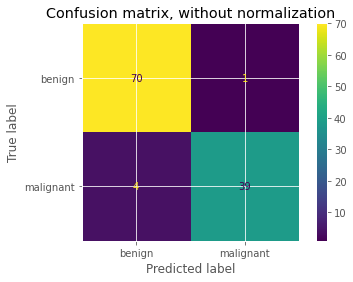

In [14]:
class_names = ['benign', 'malignant']
metrics.plot_confusion_matrix(lr, X_test, y_test, normalize=None, display_labels=class_names)
plt.title("Confusion matrix, without normalization")
plt.show()

Confusion matrix, without normalization
[[70  1]
 [ 4 39]]
Normalized confusion matrix
[[0.99 0.01]
 [0.09 0.91]]


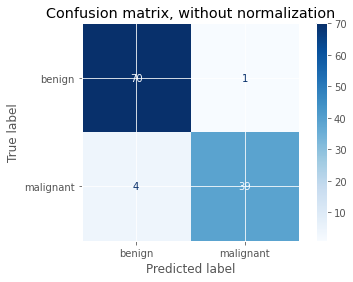

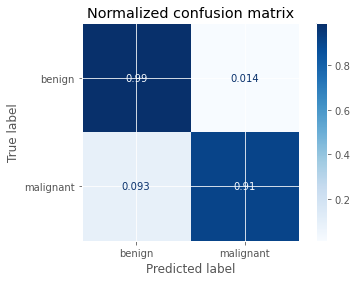

In [15]:
# Set the way floating point numbers, arrays and other NumPy objects are displayed.
np.set_printoptions(precision=2)

class_names = ['benign', 'malignant']

# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = metrics.plot_confusion_matrix(lr, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

#### 3.3 Create the confusion matrix for your classfier's performance on the test set.

Convert confusion_matrix to a dataframe. 

    index=['is_healthy', 'is_cancer']
    columns=['predicted_healthy','predicted_cancer']

In [16]:
# ANSWER
c_matrix = pd.DataFrame(metrics.confusion_matrix(y_test, y_pred_class),
                        index =['is_healthy', 'is_cancer'],
                        columns = ['predicted_healthy','predicted_cancer'])
c_matrix

,predicted_healthy,predicted_cancer
is_healthy,70,1
is_cancer,4,39


#### 3.4 Calculate Accuracy

**Classification Accuracy:** Overall, how often is the classifier correct?
    
    (TP + TN) / float(TP + TN + FP + FN)

In [17]:
# ANSWER
TP = c_matrix.iloc[1,1]
TN = c_matrix.iloc[0,0]
FP = c_matrix.iloc[0,1]
FN = c_matrix.iloc[1,0]
# use float to perform true division, not integer division
(TP + TN) / float(TP + TN + FP + FN)

0.956140350877193

#### 3.5 Calculate Classification Error

**Classification Error:** Overall, how often is the classifier incorrect?

Also known as "Misclassification Rate"

    (FP + FN) / float(TP + TN + FP + FN)

In [18]:
# ANSWER
(FP + FN) / float(TP + TN + FP + FN)

0.043859649122807015

#### 3.6 Calculate Sensitivity

**Sensitivity:** When the actual value is positive, how often is the prediction correct?

Something we want to maximize
How "sensitive" is the classifier to detecting positive instances?
- Also known as "True Positive Rate" or "Recall"
- TP / all positive
    - all positive = TP + FN
    
    sensitivity = TP / float(FN + TP)

In [19]:
# ANSWER
TP / float(FN + TP)

0.9069767441860465

#### 3.7 Calculate Specificity

**Specificity:** When the actual value is negative, how often is the prediction correct?

- Something we want to maximize. How "specific" (or "selective") is the classifier in predicting positive instances?
- TN / all negative
    - all negative = TN + FP
    
    specificity = TN / (TN + FP)

In [20]:
# ANSWER
TN / (TN + FP)

0.9859154929577465

#### 3.8 Calculate False Positive Rate

**False Positive Rate:** When the actual value is negative, how often is the prediction incorrect?

    false_positive_rate = FP / float(TN + FP)

In [21]:
# ANSWER
FP / float(TN + FP)

0.014084507042253521

#### 3.9 Calculate Precision

**Precision:** When a positive value is predicted, how often is the prediction correct?

How "precise" is the classifier when predicting positive instances?

    precision = TP / float(TP + FP)

In [22]:
# ANSWER
TP / float(TP + FP)

0.975

#### 3.10 Create a predicted test probability dataframe with column name 'class_0_pp','class_1_pp'

In [23]:
# ANSWER
# Get the predicted probability vector and explicitly name the columns:)
df_pred_proba = pd.DataFrame(lr.predict_proba(X_test),columns = ['class_0_pp','class_1_pp'])
df_pred_proba

,class_0_pp,class_1_pp
0,8.762077e-01,0.123792
1,3.036029e-08,1.000000
2,1.601130e-03,0.998399
3,9.987240e-01,0.001276
4,9.998521e-01,0.000148
...,...,...
109,8.777104e-01,0.122290
110,4.084220e-04,0.999592
111,9.992079e-01,0.000792
112,8.549375e-02,0.914506


#### 3.11 The Receiver operating characteristic (ROC) curve

Plot the ROC curve for Class 1

In [24]:
from sklearn.metrics import roc_curve, auc

In [25]:
# For class 1, find the area under the curve
# Find fpr, tpr
preds = lr.predict_proba(X_test)[:,1]
fpr, tpr, _ = metrics.roc_curve(y_test, preds)
# Find auc
roc_auc = metrics.auc(fpr, tpr)

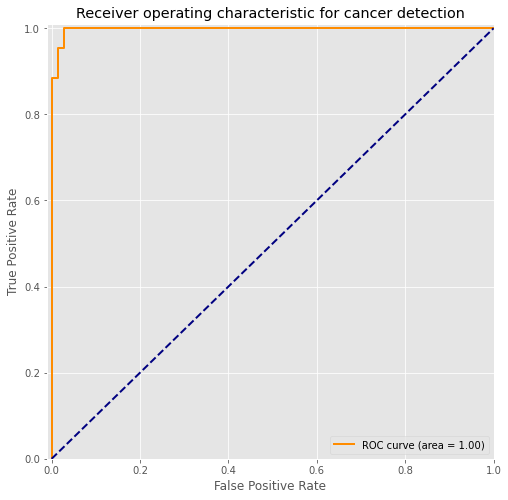

In [31]:
# For class 1, find the area under the curve
# Find fpr, tpr
preds = lr.predict_proba(X_test)[:,1]
fpr, tpr, _ = metrics.roc_curve(y_test, preds)
# Find auc
roc_auc = metrics.auc(fpr, tpr)

# Plot of a ROC curve for class 1 (has_cancer)
plt.figure(figsize=[8,8])

# Plot fpr, tpr
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw = lw, label = 'ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color = 'navy', lw = lw, linestyle = '--')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.01])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for cancer detection')
plt.legend(loc = "lower right")
plt.show()

**References**

[Breast Cancer Wisconsin (Diagnostic) Data Set](https://www.kaggle.com/uciml/breast-cancer-wisconsin-data/downloads/breast-cancer-wisconsin-data.zip/2)

[Validation curves: plotting scores to evaluate models](https://scikit-learn.org/stable/modules/learning_curve.html#learning-curves)



---



---



> > > > > > > > > © 2021 Institute of Data


---



---



